In [7]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

fig = px.pie(
    data_frame = churn_data,
    names = 'Exited',
    height = 300,
    width = 700,
    title = 'Соотношение ушедших и лояльных клиентов'
)
fig.show()

Количество лояльных клиентов превышает количество ушедших почти в 4 раза.

In [9]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

histogram_data = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=300,
    width=700,
    title='Распределение баланса на счетах клиентов в банке'
)
fig.show()

Присутствует тенценция роста количества клиентов банка, имеющих на счету от 2500$ до 123000$. Плавно снижается количество клиентов банка, имеющих на балансе 124000$ и более.

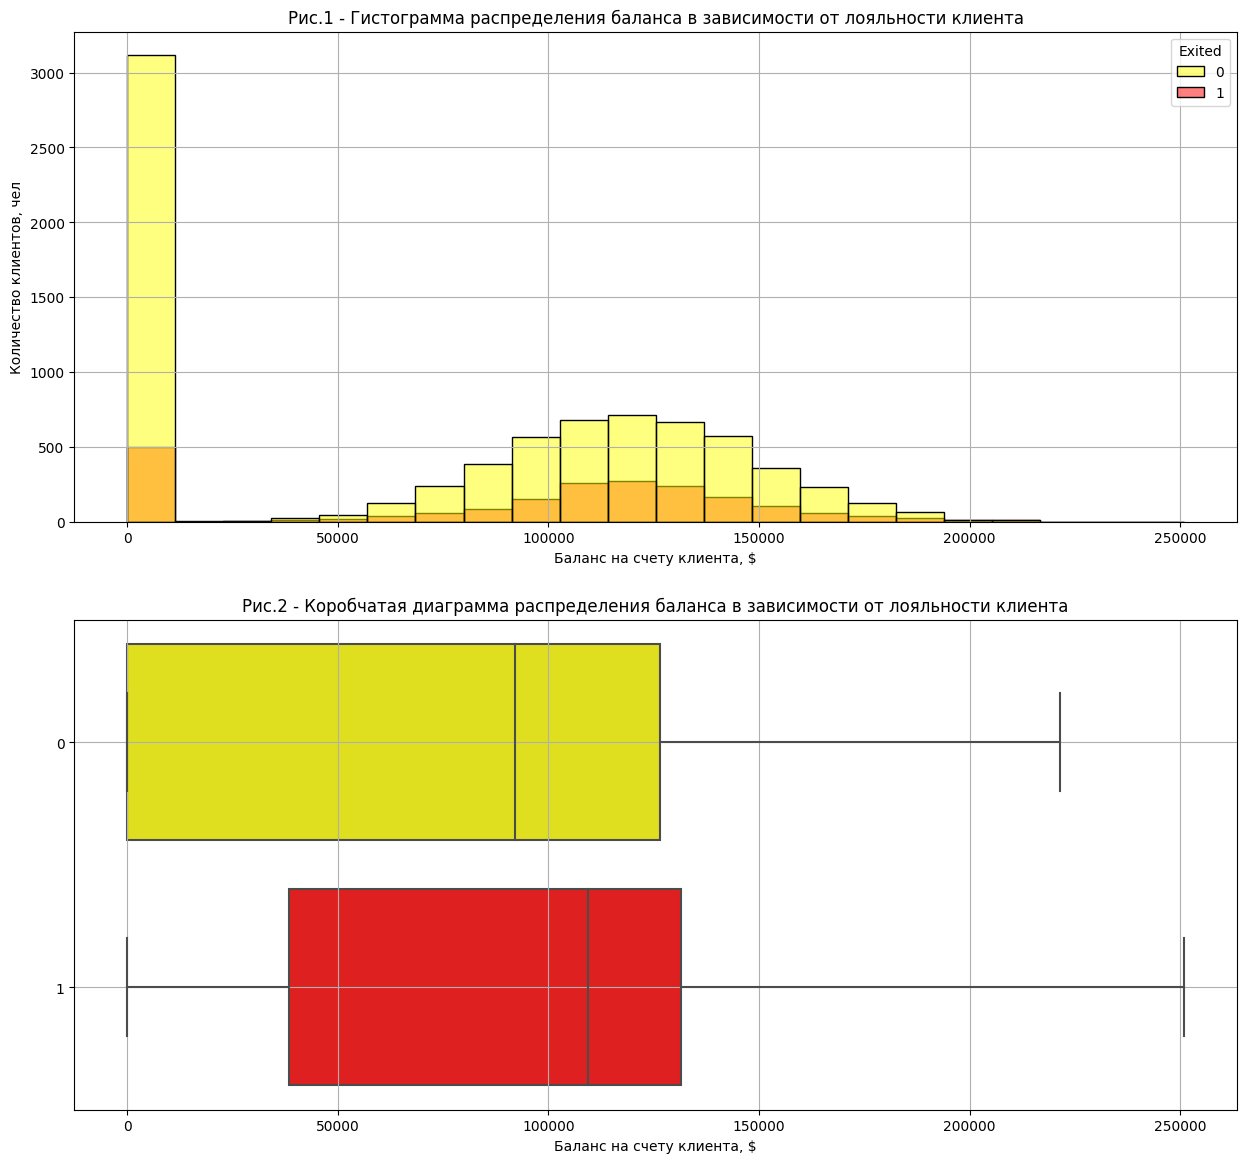

In [10]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 14))
histplot=sns.histplot(
data=churn_data,
x='Balance',
hue='Exited',
ax=axes[0],
palette=['yellow', 'red']
)
histplot.set_title('Рис.1 - Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Баланс на счету клиента, $')
histplot.grid()
boxplot=sns.boxplot(
data=churn_data,
y='Exited',
x='Balance',
orient='h',
ax=axes[1],
palette=['yellow', 'red']
)
boxplot.set_title('Рис.2 - Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel('')
boxplot.set_xlabel('Баланс на счету клиента, $')
boxplot.grid()

Диапазон баланса лояльных клиентов банка приблизительно на четверть шире, чем диапазон баланса ушедших клиентов. Максимальные границы баланса ушедших и лояльных клиентов банка близки, но банк покидают клиенты, баланс которых немного превышает баланс лояльных (разница в сумму до 25000$). В связи с этой тенденцией, банк может предложить программу лояльности для клиентов, баланс на счету которых выше ~190000$: например, повышенный кешбек в виде процента на остаток по счёту, бесплатное обслуживание, льготное кредитование и т.п.

<AxesSubplot: title={'center': 'Распределенние оттока в зависимости от возраста клиентов'}, xlabel='Возраст клиентов', ylabel='Лояльность клиентов'>

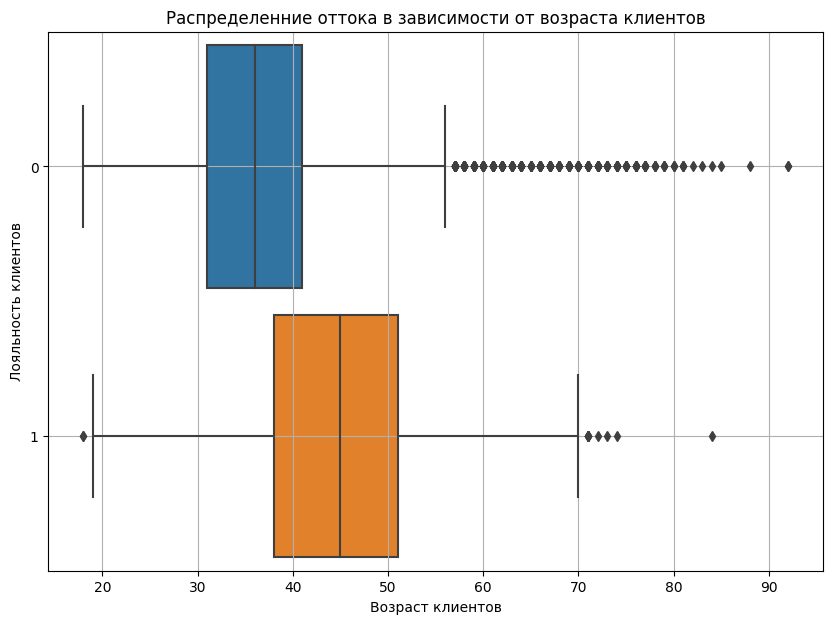

In [11]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data = churn_data,
    x = 'Age',
    y = 'Exited',
    orient = 'h',
    width = 0.9
)
boxplot.set_title('Распределенние оттока в зависимости от возраста клиентов');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Лояльность клиентов');
boxplot.grid()
boxplot

Большая часть лояльной аудитории банка - клиенты в возрасте от ~31 до ~41 года. Чаще уходят клиенты в возрастном диапазоне от ~38 лет до ~51 года - на эту категорию стоит обратить внимание. В группе лояльных клиентов больше потенциальных выбросов в диапазоне от ~56 лет до 70 - такие клиенты реже уходят.

Text(0, 0.5, 'Предполагаемая зарплата')

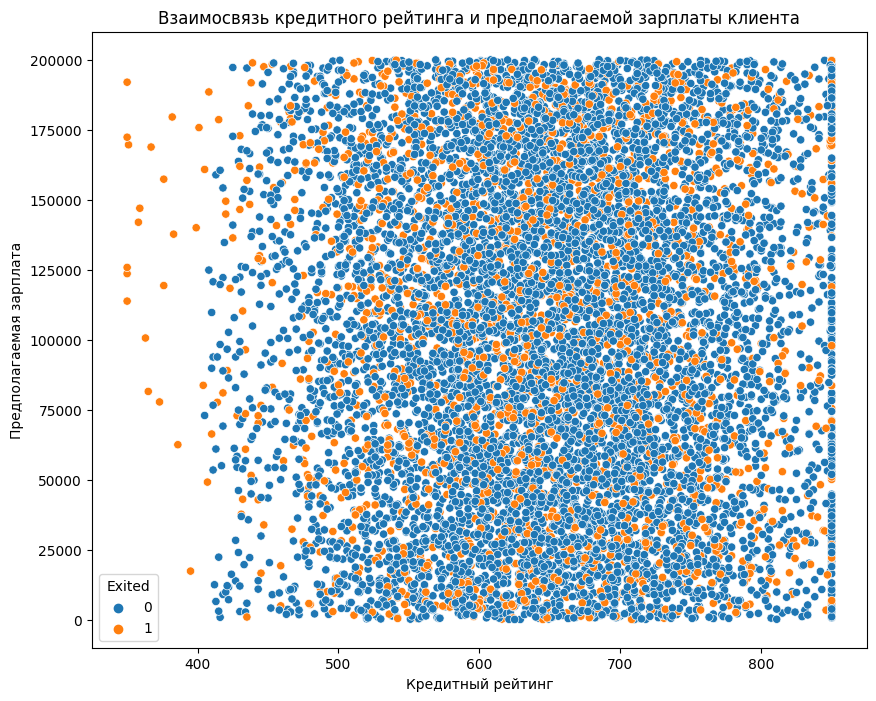

In [1]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

fig, axes = plt.subplots(figsize=(10,8))
sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
)

axes.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиента')
axes.set_xlabel('Кредитный рейтинг')
axes.set_ylabel('Предполагаемая зарплата')

Взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты не выявлено.

In [2]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

fig = px.pie(
    data_frame=churn_data[churn_data['Exited'] == 1],
    names = 'Gender',
    height = 300,
    width = 700,
    title = 'Соотношение пола ушедших клиентов'
)
fig.show()

Немного чаще банк покидают клиенты женщины.

In [3]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()
#print(grouped_by_exit)

fig = px.bar(
data_frame=grouped_by_exit,
x=grouped_by_exit.index,
y=['Exited', 'Loyal'],
height=500, #высота
width=700, #ширина
title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig

Самая лояльная группа клиентов банка в разрезе числа приобретённых услуг - это клиенты, пользующиеся двумя услугами банка. В данной группе число лояльных клиентов превышает число ушедших в 12 раз.
Среди клиентов, приобретающих 1 услугу банка, число лояльных превышает число ушедших в 2,5 раза.
Среди клиентов, приобретающих 3 услуги банка, число ушедших превышает число лояльных приблизительно в 5 раз.
Среди клиентов, приобретающих 4 услуги банка, отсутсвуют лояльные - только ушедшие.

In [5]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

active_data = churn_data.groupby(['IsActiveMember'], as_index=False)['Exited'].sum()
fig = px.bar(
data_frame=active_data,
x='IsActiveMember',
y='Exited',
height=500, #высота
width=700, #ширина
color='IsActiveMember',
title='Взаимосвязь наличия статуса активного клиента на отток клиентов'
)
fig

Из банка почти в два раза чаще уходят клиенты, неимеющие статус активного пользователя, чем клиенты со статусом активного пользователя. Следовательно, необходимо увеличить в банке число клиентов, имеющих статус активного пользоватея. Для этого можно сделать специальную программу лояльности для активных пользователей.

In [2]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

geography_dt = round(churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()*100, 2)

fig = px.choropleth(
data_frame=geography_dt, 
locations="Geography", 
locationmode = "country names", 
color= 'Exited', 
title='Карта оттока клиентов', 
width=800, 
height=500, 
color_continuous_scale='Rainbow'
)
fig.show()

Больше всего отток клиентов из Германии. Затрудняюсь ответить с чем это может быть связано

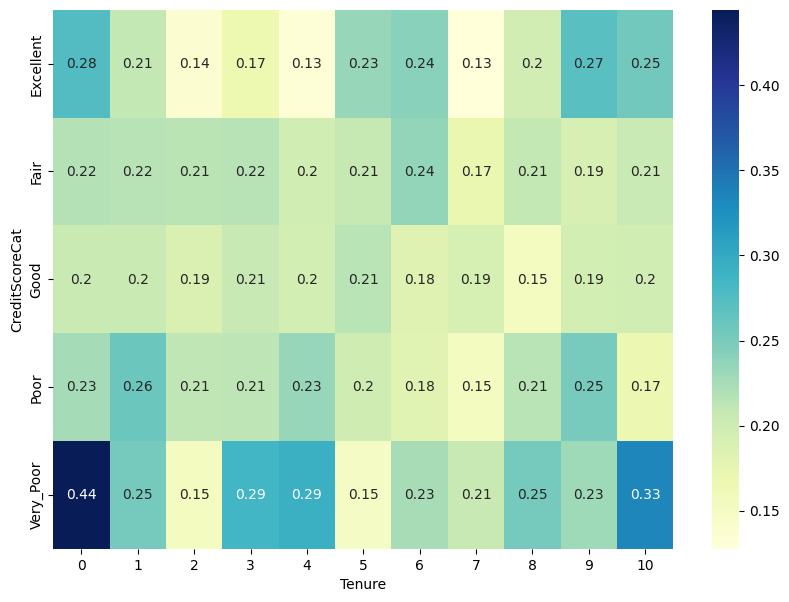

In [5]:
# 9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

churn_data = pd.read_csv(r'C:\Users\grish\OneDrive\Рабочий стол\skillfactory\pandas\data\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

heat = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
    aggfunc = 'mean'
)

fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(data=heat, cmap='YlGnBu', annot=True)

Из банка чаще всего уходят клиенты с низким кредитным рейтингом (от 300 до 500), пользующиеся услугами банка менее 1 года. На втором месте клиенты с таким же крединтым рейтингом, но пользующиеся услугами банка 10 лет.